Importing Libraries

In [2]:
import tensorflow as tf
import os
import shutil
import numpy as np
import random
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from pathlib import Path
import re
import cv2
import glob
from keras import backend as K
tf.__version__

#check if tensorflow gpu is being used
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("tensorflow version:", tf.__version__)

2022-11-07 09:13:33.548063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 09:13:33.657013: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 09:13:34.500467: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64:/home/xihan/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-11-07 09:13:34.500516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfe

Num GPUs Available:  1
tensorflow version: 2.10.0


2022-11-07 09:13:35.906511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 09:13:35.922194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 09:13:35.922336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Data Preprocessing

In [2]:
# #USED ONLY FOR CREATING THE DATASET (ONLY DONE ONCE)

# BASE_RAW = 'C:/Users/abhip/Desktop/School/Robotic LUS/model_creation/data/clarius_V2_frames/'
# BASE_NEW = 'C:/Users/abhip/Desktop/School/Robotic LUS/model_creation/data/V2_dataset'
# ANNOTATIONS = 'C:/Users/abhip/Desktop/School/Robotic LUS/model_creation/data/project-4-at-2022-09-06-15-27-21bd68eb' 


# trainX_length = 0
# for dirpath, dirs, files in os.walk(BASE_RAW):
#     if dirpath.__contains__("Labels"):
#         break
#     for file in files:
#         if file.__contains__("Frame"):
#             folderName = os.path.basename(file)
#             # print(folderName)
#             folderName = folderName[5:-4]
#             # print(folderName),
#             newDirName = BASE_NEW + "/" + folderName
#             image_folder = "{}/image/".format(newDirName)
#             mask_folder = "{}/mask/".format(newDirName)
#             dark_folder = '{}dark/'.format(mask_folder)
#             light_folder = '{}light/'.format(mask_folder)
#             # print(newDirName)

#             #creating the folders
#             os.makedirs(newDirName, mode = 0o666, exist_ok=True)
#             os.makedirs(image_folder, mode = 0o666, exist_ok=True)
#             os.makedirs(mask_folder, mode = 0o666, exist_ok=True)
#             os.makedirs(dark_folder, mode = 0o666, exist_ok=True)
#             os.makedirs(light_folder, mode = 0o666, exist_ok=True)
            

#             #copying the image file into the folders
#             old_source = "{}/{}".format(dirpath, file)
#             target_source = "{}/{}".format(image_folder,file)
#             shutil.copyfile(old_source, target_source) 
#             # print(dirpath)
#             trainX_length+=1

# # #copying mask files into designated folders
# # for dirpath, dirs, files in os.walk(BASE_TRAIN_PATH):
# #     if dirpath.__contains__("Labels"):
# #         for file in files:
# #             stringLocation = re.search('.*frame\d',file).group(0) #searhes and extracts the specific file name (up until a certain desired point)
# #             if file.__contains__("shadow"):
# #                 target_source =  "{}/{}/mask/dark/{}".format(BASE, stringLocation, file)
# #             else:
# #                 target_source = "{}/{}/mask/light/{}".format(BASE, stringLocation, file)
# #             old_source = "{}/{}".format(dirpath, file)
# #             shutil.copyfile(old_source, target_source) 



# #copying mask files into designated folders
# for dirpath, dirs, files in os.walk(ANNOTATIONS):
#     for file in files:
#         # stringLocation = re.search('.*frame\d',file).group(0) #searhes and extracts the specific file name (up until a certain desired point)
#         stringLocation = re.search('[0-9]+',file).group(0) 
#         IdealLocation = int(stringLocation) - 978
#         if file.__contains__("Dark"):
#             target_source =  "{}/{}/mask/dark/{}".format(BASE_NEW, IdealLocation, file)
#         else:
#             target_source = "{}/{}/mask/light/{}".format(BASE_NEW, IdealLocation, file)
#         old_source = "{}/{}".format(dirpath, file)
#         shutil.copyfile(old_source, target_source) 

# print("done")

In [3]:
# string_example = "task-980-annotation-60-by-1-tag-Dark features-0.png"
# stringLocation = re.search('[0-9]+',string_example).group(0) 
# IdealLocation = int(stringLocation) - 978
# IdealLocation

In [3]:
def get_pleural_area(img):
    return(img[:300,238:880])

Resizing training images and masks


100%|████████████████████████████████████████████████████| 721/721 [00:06<00:00, 103.55it/s]


Done!


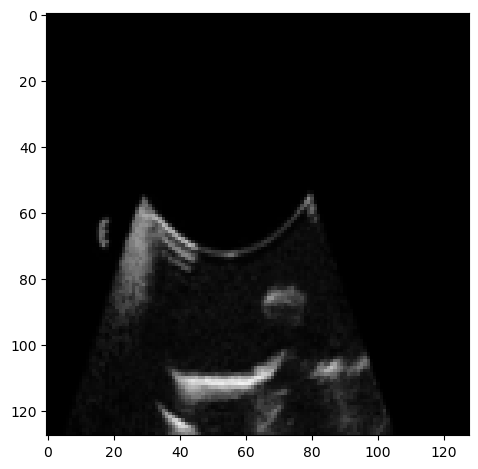

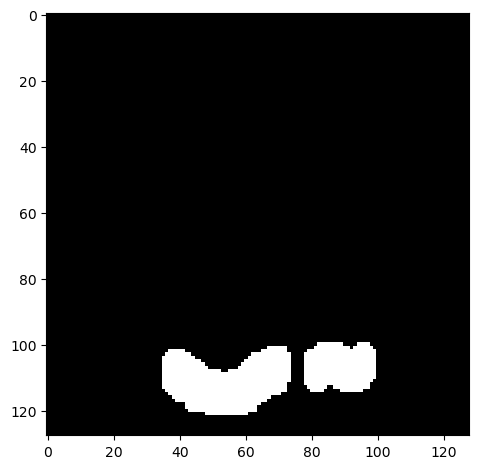

In [39]:
#IMAGE DATASET PRE-PROCESSING

#Set Random Seed
seed = 42
np.random.seed = seed
 
TRAIN_PATH = '../dataset'
# TEST_PATH = 'Data/stage_test/'

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1 #originally 3

#get the folder names(filename), and creates a tuple
train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids =  next(os.walk(TEST_PATH))[1]

#Create Empty Arrays to store images
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

#Read all the images and resize them
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + "/" + id_
    h, w = IMG_HEIGHT, IMG_WIDTH
    img = imread(path + '/image/' + "Frame" + id_ + '.jpg')[:,:,:IMG_CHANNELS]

    #Capture pleural area by cropping original image
    img = get_pleural_area(img)

    #Image resizing to lower resolution
    img = resize(img, (h, w), mode='constant', preserve_range=True)
    X_train[n] = img

    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    # print(path + '/mask/light/')
    for _, _, mask_file in os.walk(path + '/mask/light/'):
        mask_ = imread(path + '/mask/light/' + mask_file[0])

        #Capture Pleural Area (Mask)
        mask_ = get_pleural_area(mask_)

        mask_ = resize(mask_, (h, w , 1), mode='constant', preserve_range=True)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

#test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []

# print('Resizing test images')
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#    path = TEST_PATH + id_
#    image_number = id_[4:] 
#    img = imread(path + "/" + image_number + '.png')[:,:,:IMG_CHANNELS]
#    sizes_test.append([img.shape[0], img.shape[1]])
#    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True)
#    X_test[n] = img #fill empty array with values

print('Done!')
image_x = random.randint(0,len(train_ids))
imshow(cv2.cvtColor(X_train[image_x],cv2.COLOR_GRAY2RGB))
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [7]:
# #Image parameters 128x128x3
# IMG_WIDTH = 128
# IMG_HEIGHT = 128
# IMG_CHANNELS = 3

# #POCOVID Dataset Testing (Pre-processing)
# X_test_pocovidnet = np.zeros((len(regular_files), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test2 = []


# print('Resizing POCOVID Dataset test images')
# for n, id_ in tqdm(enumerate(regular_files), total=len(regular_files)):
#    path = regular_files[n]
#    #folder_name = path[4:]
#    img = imread(path)[:,:,:IMG_CHANNELS]
#    #img = imread(path + "/" + image_number + '.jpg')[:,:,:IMG_CHANNELS]
#    sizes_test2.append([img.shape[0], img.shape[1]])
#    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True)
#    X_test_pocovidnet[n] = img #fill empty array with values

# print('Done!')

In [8]:
# #Link 1: https://www.kaggle.com/bguberfain/elastic-transform-for-data-augmentation 
# #Link 2: https://www.kaggle.com/babbler/mnist-data-augmentation-with-elastic-distortion 

# import numpy as np
# from scipy.ndimage import map_coordinates
# from scipy.ndimage import gaussian_filter

# index2 = 10

# def elastic_transform(image, alpha_range, sigma_range, random_state=None):
#     """Elastic deformation of images as described in [Simard2003]_.
#     .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
#        Convolutional Neural Networks applied to Visual Document Analysis", in
#        Proc. of the International Conference on Document Analysis and
#        Recognition, 2003.
       
#    # Arguments
#        image: Numpy array with shape (height, width, channels). 
#        alpha_range: Float for fixed value or [lower, upper] for random value from uniform distribution.
#            Controls intensity of deformation.
#        sigma: Float, sigma of gaussian filter that smooths the displacement fields.
#        random_state: `numpy.random.RandomState` object for generating displacement fields.
#     """
    
#     if random_state is None:
#         random_state = np.random.RandomState(None)
        
#     if np.isscalar(alpha_range):
#         alpha = alpha_range
#     else:
#         alpha = np.random.uniform(low=alpha_range[0], high=alpha_range[1])
    
#     if np.isscalar(sigma_range):
#         sigma = sigma_range
#     else:
#         sigma = np.random.uniform(low=sigma_range[0], high=sigma_range[1])

#     shape = image.shape
#     dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
#     dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

#     x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
#     indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

#     return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

# # print(X_train[index].shape)
# # transformed_sample_X = elastic_transform(X_train[index2], alpha_range= 1, sigma_range=[0,5])
# # transformed_sample_Y = elastic_transform(Y_train[index2], alpha_range= 1, sigma_range=[0,5])

# # imshow(X_train[index2])
# # plt.show()
# # imshow(Y_train[index2])
# # plt.show()
# # imshow(transformed_sample_X)
# # plt.show()
# # imshow(transformed_sample_Y)
# # plt.show()

In [9]:
#Data Augmentation
#link: https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/ 
#link 2: https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844 

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# aug = ImageDataGenerator(rotation_range=10, preprocessing_function=lambda x: elastic_transform(x, alpha_range= 1, sigma_range=[0,5]),
# 	horizontal_flip=True, fill_mode="nearest")

In [40]:
#Training/Validation Split

# print(len(X_train))
X_train = X_train[:int(X_train.shape[0]*0.9)]
print(len(X_train))
Y_train = Y_train[:int(Y_train.shape[0]*0.9)]
print(len(Y_train))
X_val = X_train[:int(X_train.shape[0]*0.1)]
Y_val = Y_train[:int(Y_train.shape[0]*0.1)]

648
648


In [41]:
#Check size of training dataset
print(len(X_train))
print(len(Y_train))

648
648


Developing the Model

In [42]:
def myDiceLoss(y_true, y_pred):
   my_intersection = K.sum(tf.cast(y_pred, dtype=tf.float32) * tf.cast(y_true, dtype=tf.float32))
   my_union = K.sum(tf.cast(y_pred, dtype=tf.float32))+K.sum(tf.cast(y_true, dtype=tf.float32))
   my_smooth = 1
   my_dice = K.mean((2. * my_intersection + my_smooth)/(my_union + my_smooth)) 
   return 1-my_dice

In [43]:
#Reference: https://notebook.community/cshallue/models/samples/outreach/blogs/segmentation_blogpost/image_segmentation 

def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

In [44]:
#Reference: https://notebook.community/cshallue/models/samples/outreach/blogs/segmentation_blogpost/image_segmentation 

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [45]:
def jaccard_distance_loss(y_true, y_pred, smooth=100):
    """
    Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
            = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))
    
    The jaccard distance loss is usefull for unbalanced datasets. This has been
    shifted so it converges on 0 and is smoothed to avoid exploding or disapearing
    gradient.
    
    Ref: https://en.wikipedia.org/wiki/Jaccard_index
    
    @url: https://gist.github.com/wassname/f1452b748efcbeb4cb9b1d059dce6f96
    @author: wassname
    """
    intersection = K.sum(K.abs(tf.cast(y_true, dtype=tf.float32) * tf.cast(y_pred, dtype=tf.float32)))
    sum_ = K.sum(K.abs(tf.cast(y_true, dtype=tf.float32)) + K.abs(tf.cast(y_pred, dtype=tf.float32)))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

In [46]:
#Reference: https://notebook.community/cshallue/models/samples/outreach/blogs/segmentation_blogpost/image_segmentation 

def bce_dice_loss(y_true, y_pred):
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [47]:
#define the input layer

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

#convert each pixel integer into a floating point
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#contraction path (start with feature selection of 16 with 3,3 kernel)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
#Outputs
outputs = tf.keras.layers.Conv2D(1, (1,1), activation= 'sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])


#useful link for hyperparameter tuning: https://www.kaggle.com/weilinku/modified-u-net-model-with-hyperparameter-tuning

#DIFFERENT COMPILERS

#Baseline
# model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) # average dice = 0.70/0.40 (withoutAugmentation)/(withAugmentation) 

#just learning rate 
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics=['accuracy']) #average dice =  with lr=1e-4 (withoutAugmentation)/(withAugmentation)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics=['accuracy']) #average dice =  with lr=1e-3 (withoutAugmentation)/(withAugmentation)

#learning rate schedule
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'binary_crossentropy', metrics=['accuracy']) #average dice =  with lr=1e-4, decay_rate=0.01 (withoutAugmentation)/(withAugmentation)

#Changing loss function
# model.compile(optimizer= 'adam', loss = dice_loss, metrics=['accuracy', dice_coeff]) # average dice = 0.55/ (withoutAugmentation)/(withAugmentation) 
model.compile(optimizer= 'adam', loss = bce_dice_loss, metrics=['accuracy', dice_coeff]) # average dice = 0.77/ (withoutAugmentation)/(withAugmentation)


model.summary()

2022-11-07 10:01:11.102816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:01:11.103709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 10:01:11.103892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 10:01:11.103990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

Model Fitting

In [48]:
#Model Checkpoint
# checkpointer = tf.keras.callbacks.ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True)

#Model Callbacks
callbacks = [
   tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
   tf.keras.callbacks.TensorBoard(log_dir='logs')
]

BS = 4
EPOCHS = 100

#With/Without Data Augmentation
# results = model.fit(aug.flow(X_train, Y_train, batch_size = BS), validation_data=(X_val, Y_val), steps_per_epoch= (len(X_train)/BS), epochs=EPOCHS, callbacks=callbacks)
results = model.fit(X_train,Y_train, validation_data=(X_val, Y_val), batch_size=4, epochs=100, callbacks=callbacks)

Epoch 1/100


2022-11-07 10:01:22.098100: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


162/162 [==============================] - 6s 11ms/step - loss: 0.3897 - accuracy: 0.9784 - dice_coeff: 0.6876 - val_loss: 0.2270 - val_accuracy: 0.9881 - val_dice_coeff: 0.8089
Epoch 2/100
162/162 [==============================] - 1s 9ms/step - loss: 0.2109 - accuracy: 0.9886 - dice_coeff: 0.8289 - val_loss: 0.1838 - val_accuracy: 0.9908 - val_dice_coeff: 0.8424
Epoch 3/100
162/162 [==============================] - 1s 9ms/step - loss: 0.1938 - accuracy: 0.9895 - dice_coeff: 0.8425 - val_loss: 0.1721 - val_accuracy: 0.9909 - val_dice_coeff: 0.8539
Epoch 4/100
162/162 [==============================] - 1s 9ms/step - loss: 0.1863 - accuracy: 0.9898 - dice_coeff: 0.8489 - val_loss: 0.1734 - val_accuracy: 0.9912 - val_dice_coeff: 0.8523
Epoch 5/100
162/162 [==============================] - 1s 9ms/step - loss: 0.1830 - accuracy: 0.9901 - dice_coeff: 0.8516 - val_loss: 0.1625 - val_accuracy: 0.9914 - val_dice_coeff: 0.8618
Epoch 6/100
162/162 [==============================] - 1s 9ms/step


KeyboardInterrupt



Save Model

In [19]:
#Save the Model
model.save("bright_features_greyscale")

INFO:tensorflow:Assets written to: bright_features_greyscale\assets


Showing Results

In [20]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'dice_coeff', 'val_loss', 'val_accuracy', 'val_dice_coeff'])


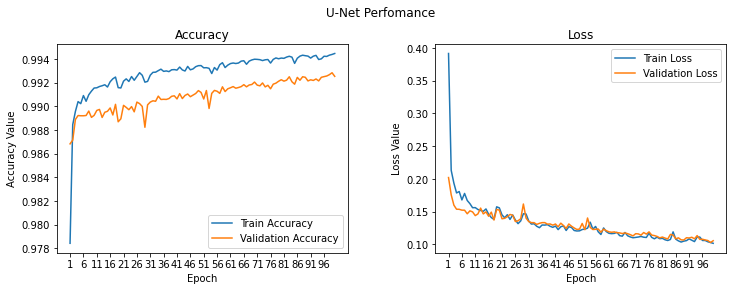

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('U-Net Perfomance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(results.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, results.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, results.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, results.history['loss'], label='Train Loss')
ax2.plot(epoch_list, results.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

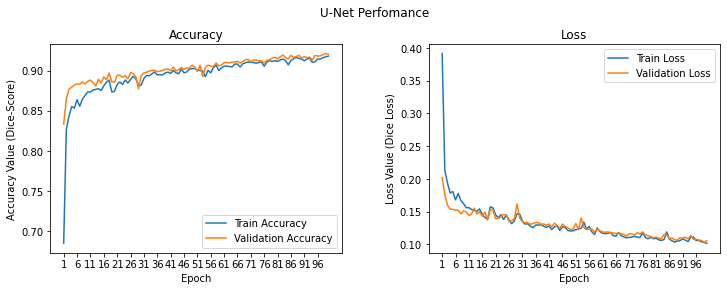

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('U-Net Perfomance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(results.history['dice_coeff'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, results.history['dice_coeff'], label='Train Accuracy')
ax1.plot(epoch_list, results.history['val_dice_coeff'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value (Dice-Score)')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, results.history['loss'], label='Train Loss')
ax2.plot(epoch_list, results.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value (Dice Loss)')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Quick Load Saved Model

In [29]:
from tensorflow.keras.models import load_model

def dice_coeff(y_true, y_pred):
    smooth = 1.
    #Flatten
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth)/ (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true,y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = tf.keras.losses.binary_crossentropy(y_true,y_pred) + dice_loss(y_true, y_pred)
    return loss

# model = load_model('model_creation/dark_features_v2', custom_objects={'bce_dice_loss': bce_dice_loss, 'dice_coeff': dice_coeff})
model = load_model('bright_features_greyscale', custom_objects={'bce_dice_loss': bce_dice_loss, 'dice_coeff': dice_coeff})

Examples

In [30]:
#Credit (Website): https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47 
#Credit (Github): https://github.com/hlamba28/UNET-TGS/blob/master/TGS%20UNET.ipynb 
#Credit for adding colorbar: https://stackoverflow.com/questions/23876588/matplotlib-colorbar-in-each-subplot

from mpl_toolkits.axes_grid1 import make_axes_locatable

preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_val, verbose=1)
# preds_test = model.predict(X_test, verbose=1)

#applying a threshold as every pixel has a probability value from 0-1
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)

def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    img1 = ax[0].imshow(X[ix, ..., 0], cmap = 'gray')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Raw Image')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size = '5%', pad = 0.05)
    fig.colorbar(img1, cax=cax, orientation ='vertical')

    img2 = ax[1].imshow(y[ix].squeeze(), cmap = 'binary_r')
    ax[1].set_title('Manual Segmentation')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size = '5%', pad = 0.05)
    fig.colorbar(img2, cax=cax, orientation ='vertical')
    
    
    img3 = ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1, cmap = 'Reds')
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted Segmentation')
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes('right', size = '5%', pad = 0.05)
    fig.colorbar(img3, cax=cax, orientation ='vertical')
    
    img4 = ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1, cmap = 'Reds')
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Predicted Segmentation Binary')
    divider = make_axes_locatable(ax[3])
    cax = divider.append_axes('right', size = '5%', pad = 0.05)
    fig.colorbar(img4, cax=cax, orientation ='vertical')




2/2 [==============================] - 0s 23ms/step


tf.Tensor(0.94479465, shape=(), dtype=float32)
tf.Tensor(0.94479465, shape=(), dtype=float32)


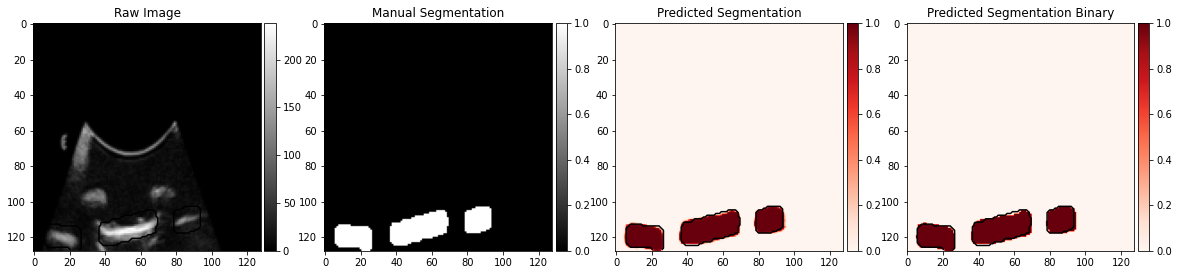

In [31]:
# Check if training data looks all right
plot_sample(X_train, Y_train, preds_train, preds_train_t, ix=20)

#References: 
# https://www.tensorflow.org/guide/tensor
# https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2 

#WORKING 
def myDiceScore(y_pred, y_true, index, smoothValue):
   my_intersection = K.sum(np.float32(y_pred[index]) * np.float32(y_true[index]))
   my_union = K.sum(np.float32(y_pred[index]))+K.sum(np.float32(y_true[index]))
   my_smooth = smoothValue
   my_dice = K.mean((2. * my_intersection + my_smooth)/(my_union + my_smooth)) 
   return my_dice

F1_score_20 = myDiceScore(preds_train, Y_train, 20, 1)
print(F1_score_20)
print(dice_coeff(Y_train[20], preds_train[20]))


tf.Tensor(0.94006747, shape=(), dtype=float32)


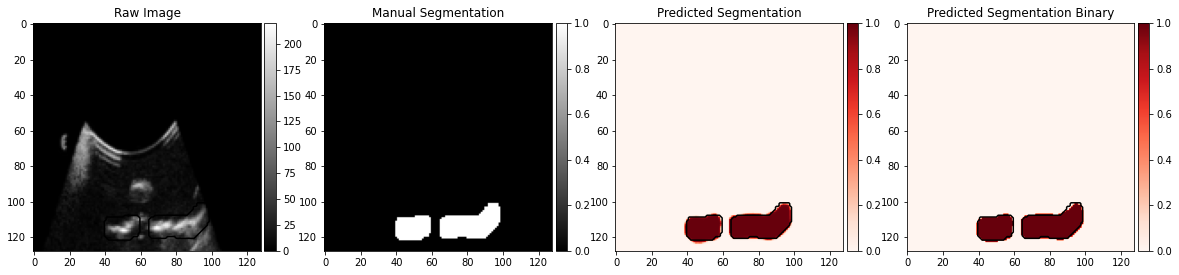

In [32]:
plot_sample(X_train, Y_train, preds_train, preds_train_t, ix=150)
F1_score_150 = myDiceScore(preds_train, Y_train, 150, 1)
print(F1_score_150)

tf.Tensor(0.8953587, shape=(), dtype=float32)


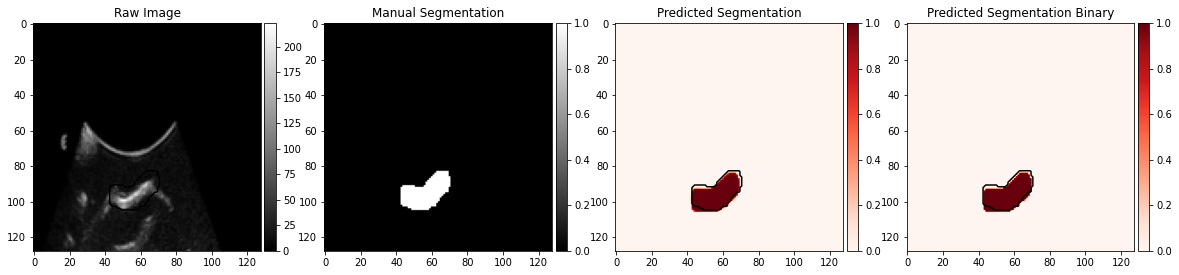

In [33]:
plot_sample(X_train, Y_train, preds_train, preds_train_t, ix=200)
F1_score_200 = myDiceScore(preds_train, Y_train, 200, 1)
print(F1_score_200)

tf.Tensor(0.94479465, shape=(), dtype=float32)


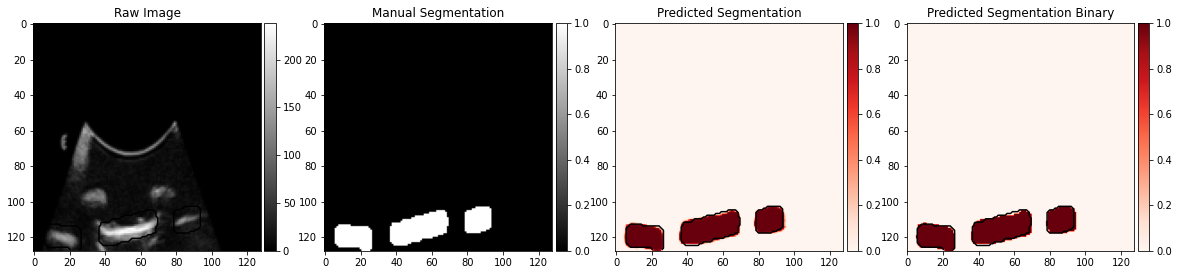

In [34]:
plot_sample(X=X_val, y= Y_val, preds=preds_val, binary_preds=preds_val_t, ix = 20)
F1_score_val_20 = myDiceScore(preds_val, Y_val, 20, 1)
print(F1_score_val_20)

In [35]:
#TOTAL AVERAGED DICE SCORE (TRIAN)
total_dice_array = np.zeros(len(Y_train))
for i in range(0, len(Y_train)):
    total_dice_array[i] = myDiceScore(preds_train, Y_train, i, 1)
    # print(total_dice_array[i]) 

# print(K.sum(total_dice_array))
# print(len(Y_train))

total_avg_dice = K.sum(total_dice_array)/len(Y_train)
print(total_avg_dice)

tf.Tensor(0.9285565721235584, shape=(), dtype=float64)


In [36]:
#TOTAL AVERAGED DICE SCORE (TEST)
total_dice_array = np.zeros(len(Y_val))
for i in range(0, len(Y_val)):
    total_dice_array[i] = myDiceScore(preds_val, Y_val, i, 1)
    # print(total_dice_array[i]) 

# print(K.sum(total_dice_array))
# print(len(Y_train))

total_avg_dice = K.sum(total_dice_array)/len(Y_val)
print(total_avg_dice)

tf.Tensor(0.918970306403935, shape=(), dtype=float64)


In [31]:
# preds_test_pocovidnet = model.predict(X_test_pocovidnet, verbose=1)

In [32]:
# def plot_test_sample(X, preds, ix=None):
#     """Function to plot the results"""
#     if ix is None:
#         ix = random.randint(0, len(X))

#     fig, ax = plt.subplots(1, 2, figsize=(20, 10))
#     img1 = ax[0].imshow(X[ix], cmap = 'gray')
#     ax[0].set_title('Raw Image')
#     divider = make_axes_locatable(ax[0])
#     cax = divider.append_axes('right', size = '5%', pad = 0.05)
#     fig.colorbar(img1, cax=cax, orientation ='vertical')

#     img2 = ax[1].imshow(preds[ix].squeeze(), vmin=0, vmax=1, cmap = 'Reds')
#     ax[1].set_title('Manual Segmentation')
#     divider = make_axes_locatable(ax[1])
#     cax = divider.append_axes('right', size = '5%', pad = 0.05)
#     fig.colorbar(img2, cax=cax, orientation ='vertical')

In [33]:
# plot_test_sample(X_test_pocovidnet,preds_test_pocovidnet, ix=60)

In [34]:
# plot_test_sample(X_test_pocovidnet,preds_test_pocovidnet, ix=59)

In [35]:
# plot_test_sample(X_test_pocovidnet,preds_test_pocovidnet, ix=70)

Displaying Stats on TensorBoard

In [36]:
%tensorboard --logdir=logs/ --host localhost --port 8088

UsageError: Line magic function `%tensorboard` not found.
